<a href="https://colab.research.google.com/github/JustynaGoc/machine-learning-bootcamp/blob/main/Maszyna_wektorow_nosnych_3_klasy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image
sns.set(font_scale = 1.3)
np.random.seed(42)

In [2]:
data_raw = load_iris()
all_data = data_raw.copy()

data = all_data["data"]
target = all_data["target"]
feature_names = [name.replace(" (cm)", "") .replace(" ", "_")for name in all_data["feature_names"]]
target_names = all_data["target_names"]
df  = pd.DataFrame(data =np.c_[data, target], columns = feature_names + ["target"])
# ograniczenie zbioru do dwoch klas
# df = df[(df["target"] ==0.0) | (df["target"] ==1.0)]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
data = df.iloc[:,[2,1]].values
target = df['target'].apply(int).values

In [4]:
data[:5], target[:5]

(array([[1.4, 3.5],
        [1.4, 3. ],
        [1.3, 3.2],
        [1.5, 3.1],
        [1.4, 3.6]]),
 array([0, 0, 0, 0, 0]))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target)


In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.svm   import SVC
classifier  = SVC( C = 1.0, kernel = "linear")
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
classifier.score(X_test,y_test)

0.9736842105263158

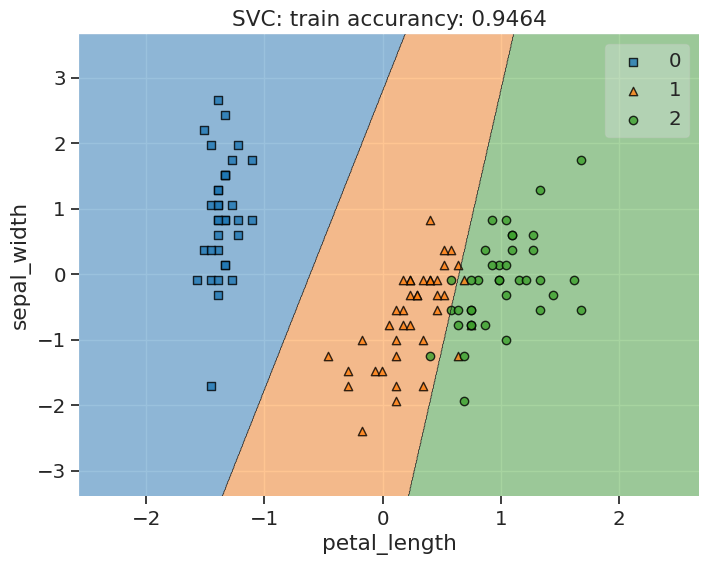

In [11]:
from mlxtend.plotting import plot_decision_regions
plt.figure( figsize = (8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accurancy: {classifier.score(X_train,y_train):.4f}')
plt.show()

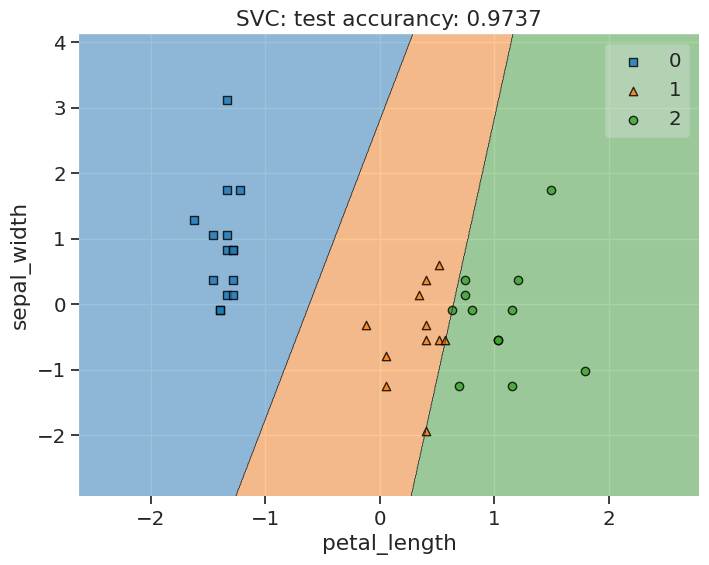

In [12]:
from mlxtend.plotting import plot_decision_regions
plt.figure( figsize = (8,6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: test accurancy: {classifier.score(X_test,y_test):.4f}')
plt.show()

In [13]:
# kLASYFIKACJA NIELINIOWAN= KLASYFIKATOR SVM - rbf

In [14]:
classifier  = SVC(C= 1.0, kernel = "rbf")
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.9736842105263158

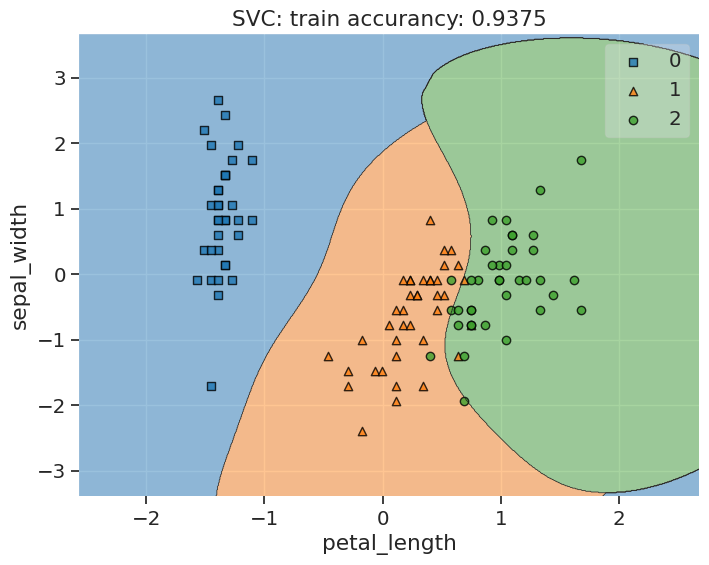

In [15]:
from mlxtend.plotting import plot_decision_regions
plt.figure( figsize = (8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accurancy: {classifier.score(X_train,y_train):.4f}')
plt.show()

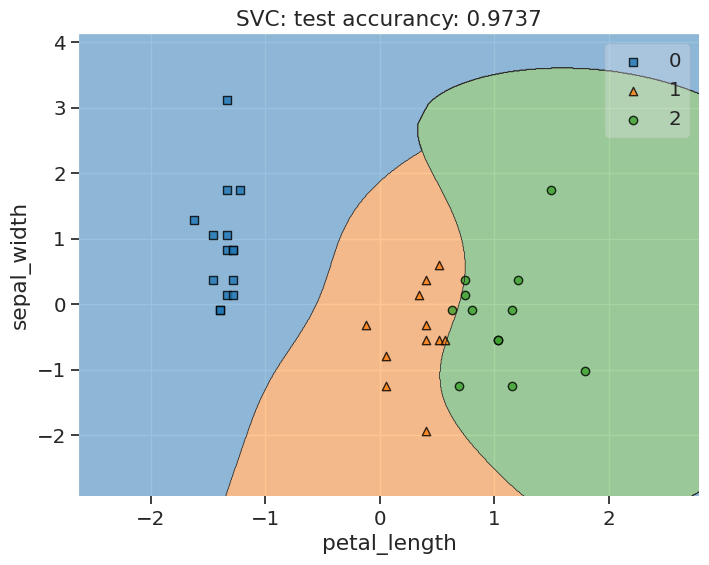

In [16]:
from mlxtend.plotting import plot_decision_regions
plt.figure( figsize = (8,6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: test accurancy: {classifier.score(X_test,y_test):.4f}')
plt.show()